## REad the data

In [2]:
import pandas as pd
from sodapy import Socrata
import numpy as np

In [3]:

import pandas as pd
from sodapy import Socrata

client = Socrata("data.texas.gov", None)

results = client.get("ubdr-4uff", limit=300000)

# Convert to pandas DataFrame
df1 = pd.DataFrame.from_records(results)

In [4]:
df = df1

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 259500 entries, 0 to 259499
Data columns (total 17 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   complaint_number          259500 non-null  object
 1   respondent_name           259500 non-null  object
 2   complainant_role          259500 non-null  object
 3   reason                    259494 non-null  object
 4   complaint_confirmed_code  259495 non-null  object
 5   disposition               258462 non-null  object
 6   received_date             259500 non-null  object
 7   closed_date               259500 non-null  object
 8   complaint_type            259499 non-null  object
 9   coverage_type             259500 non-null  object
 10  coverage_level            259500 non-null  object
 11  respondent_id             259500 non-null  object
 12  respondent_role           259498 non-null  object
 13  respondent_type           259500 non-null  object
 14  comp

In [6]:
# Drop missing rows in disposition coluMN
df = df.dropna(subset=['disposition'])

In [7]:

# get counts of disposition values in descending order
disposition_counts = df['disposition'].value_counts().sort_values(ascending=False)
print(disposition_counts)


disposition
Contract Language/Legal Issue                                                         25698
No Jurisdiction                                                                       23533
Information Furnished                                                                 17925
Question of Fact                                                                      12215
Information Furnished; Contract Language/Legal Issue                                   8106
                                                                                      ...  
Appraisal Process Invoked; Company Position Upheld; Question of Fact                      1
Corrective Action Taken; Failure to Timely Respond; Referred for Disciplinary Actn        1
Agent 1st warning; Contract Language/Legal Issue; Failure to Timely Respond               1
Referred for Disciplinary Actn; Information Furnished; Agent Resp Recvd                   1
Information Furnished; No Jurisdiction; Claim Not Clean             

### Disposition column

In [ ]:


# Define keywords for categorizing dispositions as 'verdict won' or 'verdict not won'
verdict_won_keywords = ["Claim Settled", "Additional Monies Received"]
verdict_not_won_keywords = ["No Jurisdiction", "Company Position Upheld", "Insufficient Information", "Contract Language/Legal Issue", "Question of Fact"]

# Function to categorize each disposition based on the presence of keywords
def categorize_verdict(disposition):
    if any(keyword in disposition for keyword in verdict_won_keywords):
        return "Yes"
    elif any(keyword in disposition for keyword in verdict_not_won_keywords):
        return "No"
    else:
        return "Uncategorized"  # For entries that don't match any keywords

# Apply categorization to the disposition data
df['verdict_passed'] = df['disposition'].apply(categorize_verdict)

# Drop rows where the disposition was categorized as "Uncategorized"
df = df[df['verdict_passed'] != "Uncategorized"]

# replace disposition column with verdict_passed column and drop verdict_passed
df['disposition'] = df['verdict_passed']
df = df.drop(columns=['verdict_passed'])


C:\Users\nbngc\AppData\Local\Temp\ipykernel_34504\2812971750.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['verdict_passed'] = df['disposition'].apply(categorize_verdict)


### Encode disposition

In [26]:
df['disposition'].replace(to_replace=['Yes','No'], value=[0,1])
df.head()

,respondent_name,reason,disposition,received_date,closed_date,involved_party_type,complainant_role_Attorney,complainant_role_Beneficiary,complainant_role_Consumer (Non-Insured),complainant_role_Contracted Provider,...,respondent_role_Texas Fair Insurance Plan,respondent_role_Third Party Administrators,respondent_role_Twia,respondent_role_U.S. Domiciled Insurer,respondent_role_Unauthorized Activity,respondent_role_Utilization Review Agent,respondent_role_Viatical Settlement Com/Broker,respondent_role_Wc Healthcare Provider Ntwk,respondent_type_Organization,complainant_type_Org
4,1754,6514,1,2012-06-13,2012-07-17,6117,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
5,7005,2469,1,2012-06-18,2012-07-30,6117,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
6,8952,6514,0,2012-02-27,2012-07-02,5453,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
7,1197,5121,1,2012-06-19,2012-08-06,6117,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
8,6819,6514,1,2011-10-03,2012-07-20,6117,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False


# Drop unnecessary columns

In [10]:
# drop the columns
# count of individual in column respondant type
df['respondent_type'].value_counts()

# drop columns keyword, respondent_id,complaint_number
df = df.drop(columns=['keyword','respondent_id','complaint_number'])
 

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 206840 entries, 4 to 259496
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   respondent_name           206840 non-null  object
 1   complainant_role          206840 non-null  object
 2   reason                    206839 non-null  object
 3   complaint_confirmed_code  206835 non-null  object
 4   disposition               206840 non-null  object
 5   received_date             206840 non-null  object
 6   closed_date               206840 non-null  object
 7   complaint_type            206839 non-null  object
 8   coverage_type             206840 non-null  object
 9   coverage_level            206840 non-null  object
 10  respondent_role           206840 non-null  object
 11  respondent_type           206840 non-null  object
 12  complainant_type          206840 non-null  object
 13  involved_party_type       186396 non-null  object
dtypes: object

### Handle date time objects

In [12]:
df['received_date'] = pd.to_datetime(df['received_date'])
df['closed_date'] = pd.to_datetime(df['closed_date'])
df.head()

,respondent_name,complainant_role,reason,complaint_confirmed_code,disposition,received_date,closed_date,complaint_type,coverage_type,coverage_level,respondent_role,respondent_type,complainant_type,involved_party_type
4,"CHARTER OAK FIRE INSURANCE COMPANY, THE",Insured,Unsatisfactory Settle/Offer,No,No,2012-06-13,2012-07-17,Property and Casualty,Automobile,Individual Private Pass,Ins Co - Licensed/Active,Organization,INDV,NaN
5,REASSURE AMERICA LIFE INSURANCE COMPANY,Insured,Cash Value; Misrepresentation,No,No,2012-06-18,2012-07-30,"Life, Accident and Health",Life & Annuity,Individual Life,Ins Co - Licensed/Active,Organization,INDV,NaN
6,USAA GENERAL INDEMNITY COMPANY,Third Party,Unsatisfactory Settle/Offer,No,Yes,2012-02-27,2012-07-02,Property and Casualty,Automobile,Individual Private Pass,Ins Co - Licensed/Active,Organization,INDV,Insured
7,"BLUE CROSS AND BLUE SHIELD OF TEXAS, A DIVISIO...",Insured,Denial Of Claim,No,No,2012-06-19,2012-08-06,"Life, Accident and Health",Accident and Health,Group A&H,Ins Co - Licensed/Active,Organization,INDV,NaN
8,PROPERTY AND CASUALTY INSURANCE COMPANY OF HAR...,Insured,Unsatisfactory Settle/Offer,No,No,2011-10-03,2012-07-20,Property and Casualty,Homeowners,Homeowners,Ins Co - Licensed/Active,Organization,INDV,NaN


In [13]:
# Trim whitespace from all columns with string data
df = df.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

In [14]:
# Convert all columns to propercase if they are strings
df = df.apply(lambda x: x.str.title() if x.dtype == "object" else x)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 206840 entries, 4 to 259496
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   respondent_name           206840 non-null  object        
 1   complainant_role          206840 non-null  object        
 2   reason                    206839 non-null  object        
 3   complaint_confirmed_code  206835 non-null  object        
 4   disposition               206840 non-null  object        
 5   received_date             206840 non-null  datetime64[ns]
 6   closed_date               206840 non-null  datetime64[ns]
 7   complaint_type            206839 non-null  object        
 8   coverage_type             206840 non-null  object        
 9   coverage_level            206840 non-null  object        
 10  respondent_role           206840 non-null  object        
 11  respondent_type           206840 non-null  object        
 12  complai

In [ ]:
label_enco_cols = ["respondent_name", "reason", "involved_party_type"]
one_enco_cols = ["complainant_role", "complaint_confirmed_code","complaint_type","coverage_type","coverage_level","respondent_role","respondent_type", "complainant_type"]

# Remove the text ", The" from respondent_name column if ends in ", The"
df['respondent_name'] = df['respondent_name'].str.rstrip(', The')

# for label_enco_cols do label encoding for one_enco_cols do one hot encoding
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
# Label Encoding
for col in label_enco_cols:
    le = LabelEncoder(drop_first)
    df[col] = le.fit_transform(df[col], drop_first=True)

# One Hot Encoding
df = pd.get_dummies(df, columns=one_enco_cols, drop_first=True)


In [17]:
# implement MCA on the data
# from prince import MCA
# mca = MCA(n_components=2)
# mca.fit(df)
# mca.plot_coordinates(df, figsize=(15, 15))


In [18]:
df.head()

,respondent_name,reason,disposition,received_date,closed_date,involved_party_type,complainant_role_Attorney,complainant_role_Beneficiary,complainant_role_Consumer (Non-Insured),complainant_role_Contracted Provider,...,respondent_role_Texas Fair Insurance Plan,respondent_role_Third Party Administrators,respondent_role_Twia,respondent_role_U.S. Domiciled Insurer,respondent_role_Unauthorized Activity,respondent_role_Utilization Review Agent,respondent_role_Viatical Settlement Com/Broker,respondent_role_Wc Healthcare Provider Ntwk,respondent_type_Organization,complainant_type_Org
4,1754,6514,No,2012-06-13,2012-07-17,6117,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
5,7005,2469,No,2012-06-18,2012-07-30,6117,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
6,8952,6514,Yes,2012-02-27,2012-07-02,5453,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
7,1197,5121,No,2012-06-19,2012-08-06,6117,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
8,6819,6514,No,2011-10-03,2012-07-20,6117,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False


In [19]:
df.describe()

,respondent_name,reason,received_date,closed_date,involved_party_type
count,206840.000000,206840.000000,206840,206840,206840.000000
mean,4477.893435,4468.029269,2018-05-04 05:30:51.030748160,2018-08-15 09:06:27.638754560,4341.597723
min,0.000000,0.000000,2011-04-28 00:00:00,2012-07-02 00:00:00,0.000000
25%,1197.000000,3539.000000,2015-07-06 00:00:00,2015-09-29 00:00:00,3168.000000
50%,4187.000000,4576.000000,2018-01-23 00:00:00,2018-09-19 00:00:00,4842.500000
75%,7912.000000,5538.000000,2021-05-04 00:00:00,2021-05-25 00:00:00,5963.000000
max,9592.000000,6537.000000,2024-11-13 00:00:00,2024-11-15 00:00:00,6117.000000
std,3166.884241,1558.920523,NaN,NaN,1634.830130


In [21]:
# write disposition counts to a csv file
df.to_csv('df.csv', index=False)

## Train Test Split

Cross-validation scores: [0.78734719 0.78935009 0.78417018 0.7909386  0.78401713]
Mean cross-validation score: 0.7871646386784921
Test accuracy: 0.7847933990846387
Validation accuracy: 0.7841257562781446
Feature ranking:
1. involved_party_type: 0.2557621650599972
2. reason: 0.23488813924601945
3. respondent_name: 0.22714050931541152
4. complaint_confirmed_code_Yes: 0.14987104229049975
5. respondent_role_Ins Co - Licensed/Active: 0.012417975995448518
6. respondent_role_Self-Funded / Erisa: 0.010193097767485344
7. complainant_type_Org: 0.007374325212121271
8. complaint_type_Life, Accident And Health: 0.006212338451205328
9. complainant_role_Insured: 0.006044183402641668
10. coverage_level_Individual Private Pass: 0.005651668293557137
11. coverage_type_Automobile: 0.005599172087162587
12. complainant_role_Third Party: 0.005343023531940826
13. complainant_role_Third Party Billing Service: 0.004631942568402416
14. respondent_type_Organization: 0.004534352212192381
15. coverage_level_Group A

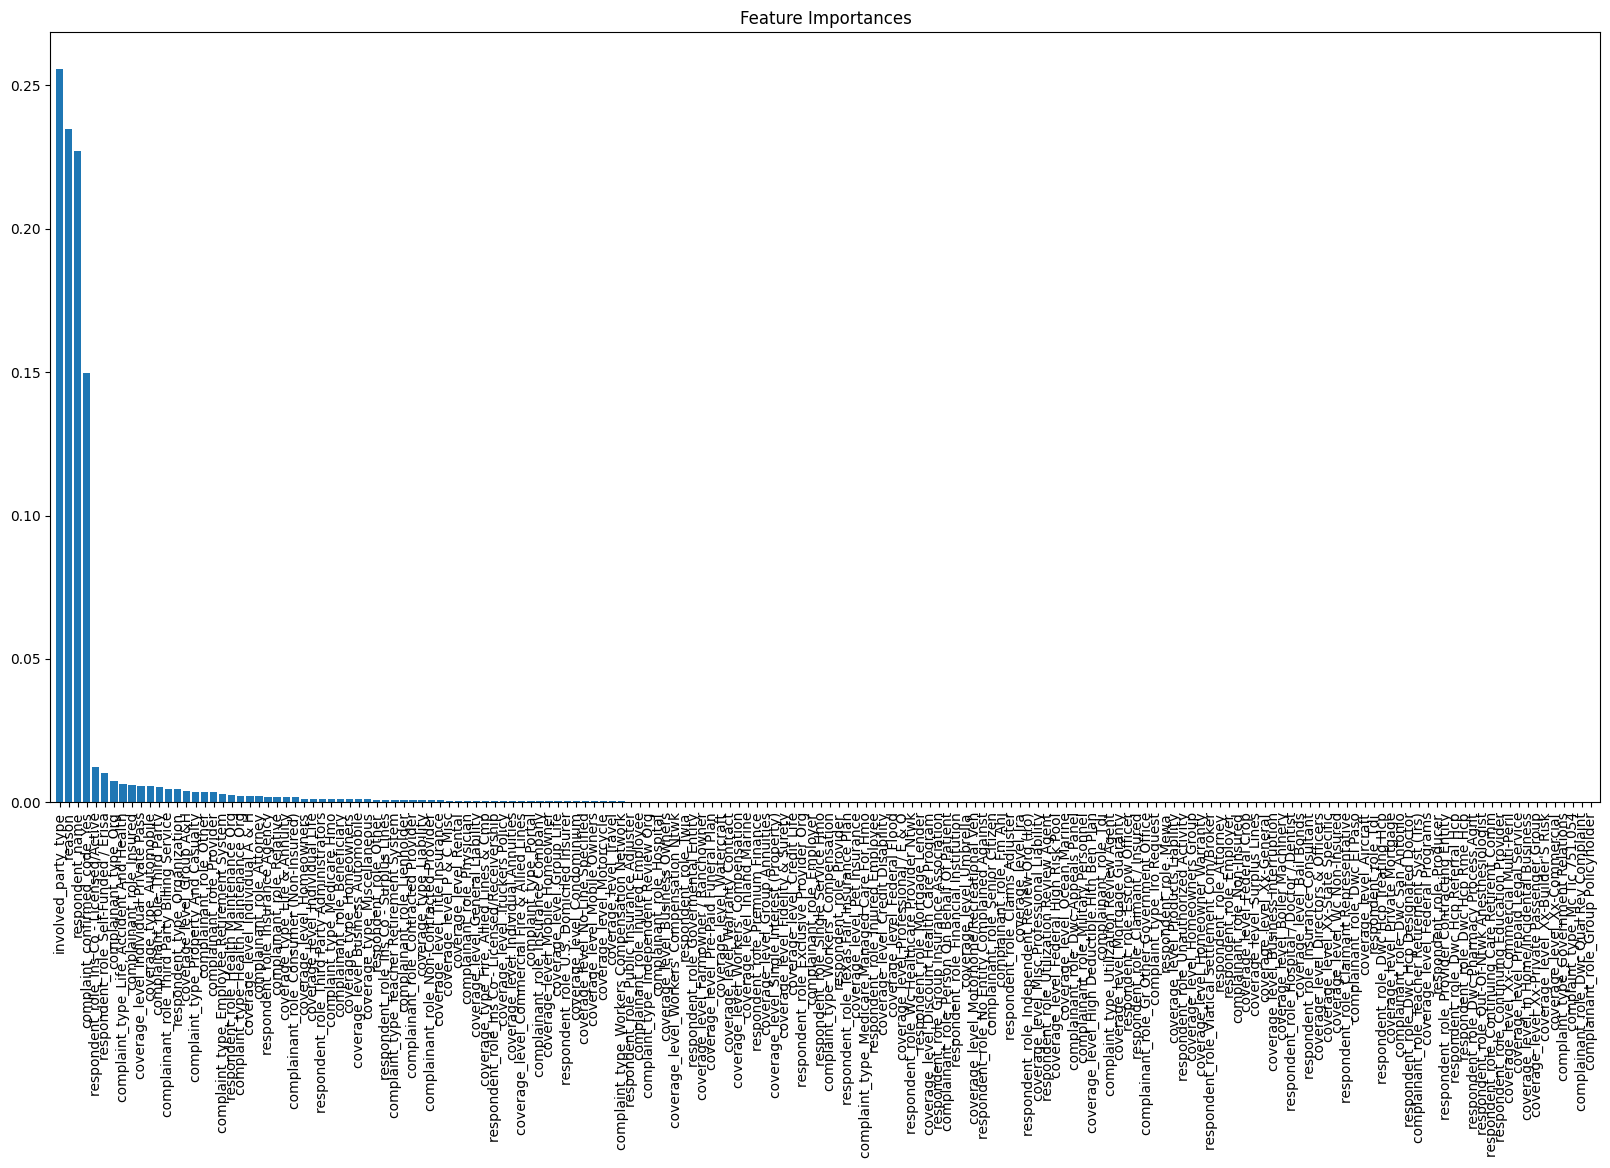

In [24]:
# Split df into train test and validation sets
# I want to split the data into 70% training, 15% validation, and 15% testing
# I also want to use 5 fold cross validation
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

# Split the data into features and target
X = df.drop(columns=['disposition', 'received_date', 'closed_date'])
y = df['disposition']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Split the training data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.5, random_state=42)

# Define the cross-validation method
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Define the model
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state=42)

# Fit the model
model.fit(X_train, y_train)

# Get the cross-validation scores
scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='accuracy')

# Print the cross-validation scores
print("Cross-validation scores:", scores)

# Print the mean cross-validation score
print("Mean cross-validation score:", scores.mean())

# Get the test accuracy
test_accuracy = model.score(X_test, y_test)
print("Test accuracy:", test_accuracy)

# Get the validation accuracy
val_accuracy = model.score(X_val, y_val)
print("Validation accuracy:", val_accuracy)

# Get the feature importances
importances = model.feature_importances_

# Get the indices of the features sorted by importance
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")
for f in range(X.shape[1]):
    print(f"{f + 1}. {X.columns[indices[f]]}: {importances[indices[f]]}")
    
# Plot the feature importances
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 10))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()


In [ ]:
# Save the model
import joblib
joblib.dump(model, 'model.joblib')

# Save the feature importances
np.save('importances.npy', importances)

# Save the column names
np.save('columns.npy', X.columns)

# Save the label encoders
import pickle
with open('label_encoders.pkl', 'wb') as f:
    pickle.dump(le, f)
    
# Save the one hot encoders
with open('one_hot_encoders.pkl', 'wb') as f:
    pickle.dump(ohe, f)
    
# Save the cross-validation scores
np.save('cross_val_scores.npy', scores)

# Save the test accuracy
np.save('test_accuracy.npy', test_accuracy)

# Save the validation accuracy
np.save('val_accuracy.npy', val_accuracy)
